自定义函数

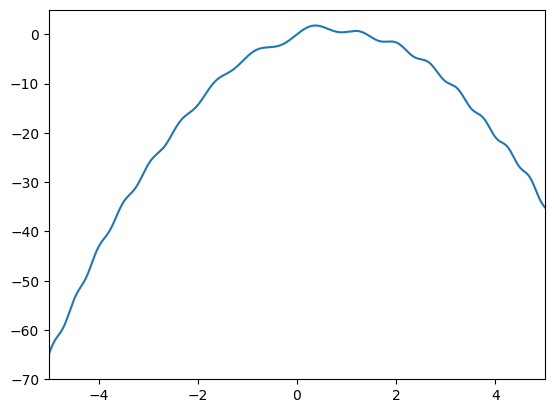

In [2]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def f(x):
    return 3 * x - 2 * x ** 2  + np.sin(5*x) * np.cos(x**2)

x_data = np.linspace(-5, 5, 1000)
y_data = f(x_data)

plt.axis([-5, 5, -70, 5])
plt.plot(x_data, y_data)
plt.show()

In [3]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    # add one more layer and return the output of this layer
    Weights = tf.Variable(shape=[in_size, out_size], dtype=tf.float32,initial_value=tf.random.uniform(shape=[in_size, out_size],
                          minval=-0.1, maxval=0.1))
    biases = tf.Variable(shape=[out_size], dtype=tf.float32, initial_value=tf.zeros(out_size))
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs



In [4]:
# define placeholder for inputs to network
import tensorflow.compat.v1 as tf_v1
tf_v1.disable_eager_execution()
xs = tf_v1.placeholder(tf.float32, shape=(None, 1))
ys = tf_v1.placeholder(tf.float32, shape=(None, 1))
# add hidden layer
l1 = add_layer(xs, 1, 64, activation_function=tf.nn.relu)
l2 = add_layer(l1, 64, 8, activation_function=tf.nn.relu)
# add output layer
prediction = add_layer(l2, 8, 1, activation_function=None)
 
# the error between prediciton and real data
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys - prediction), axis=[1]))
train_step = optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize
 
# important step
init = tf.compat.v1.global_variables_initializer()
sess = tf.compat.v1.Session()
sess.run(init)


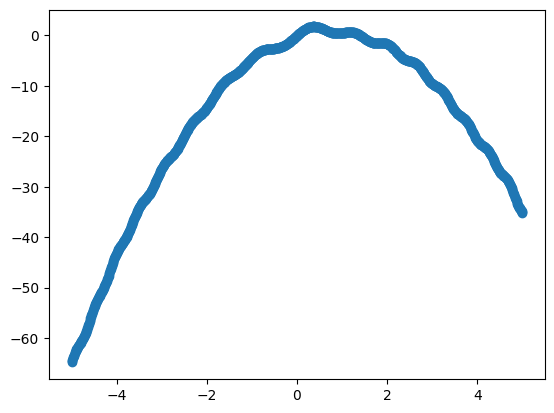

TypeError: Argument `fetch` = <bound method Optimizer.minimize of <tensorflow.python.training.gradient_descent.GradientDescentOptimizer object at 0x0000029EA2504F40>> has invalid type "method" must be a string or Tensor. (Can not convert a method into a Tensor or Operation.)

In [5]:
x_data = x_data.reshape(-1, 1)
y_data = y_data.reshape(-1, 1)
# plot the real data
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()
 
for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to visualize the result and improvement
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(prediction, feed_dict={xs: x_data})
        # plot the prediction
        lines = ax.plot(x_data, prediction_value, 'r-', lw=1)
        plt.pause(0.1)